In [9]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import numpy as np

In [10]:
series = read_csv(r'Daily_Min_Temp.csv', header=0, index_col=0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


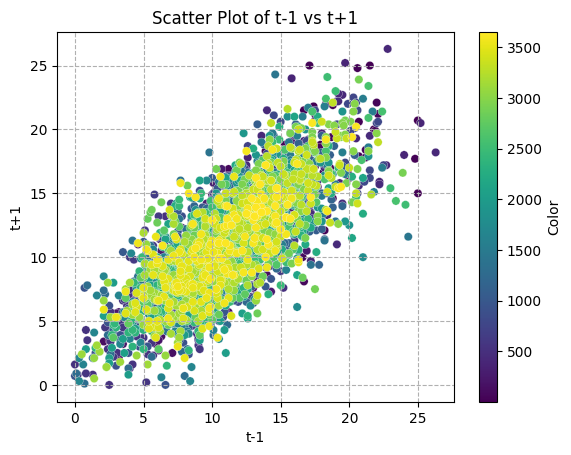

In [12]:
colors = np.arange(len(dataframe)) 
plt.scatter(dataframe['t-1'], dataframe['t+1'], c=colors, cmap='viridis', alpha=1, edgecolors='w', linewidth=0.2)
plt.xlabel('t-1')
plt.ylabel('t+1')
plt.title('Scatter Plot of t-1 vs t+1')
plt.colorbar(label='Color')
plt.grid(True, linestyle='--', alpha=1)
plt.show()

In [13]:
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't+1']
print(dataframe.head)

<bound method NDFrame.head of        t-3   t-2   t-1   t+1
0      NaN   NaN   NaN  20.7
1      NaN   NaN  20.7  17.9
2      NaN  20.7  17.9  18.8
3     20.7  17.9  18.8  14.6
4     17.9  18.8  14.6  15.8
...    ...   ...   ...   ...
3645  10.0  12.9  14.6  14.0
3646  12.9  14.6  14.0  13.6
3647  14.6  14.0  13.6  13.5
3648  14.0  13.6  13.5  15.7
3649  13.6  13.5  15.7  13.0

[3650 rows x 4 columns]>


In [14]:
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(5))

   mean(t-2,t-1)   t+1
0            NaN  20.7
1            NaN  17.9
2          19.30  18.8
3          18.35  14.6
4          16.70  15.8


In [15]:
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [16]:
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8
